In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')
train

,Unnamed: 0,Unnamed: 0.1,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource,next_case,...,A_APPROVED,O_ACCEPTED,A_ACTIVATED,O_CANCELLED,A_DECLINED,A_CANCELLED,W_Afhandelen leads,O_DECLINED,W_Nabellen incomplete dossiers,W_Beoordelen fraude
0,103501,103501,195869,W_Valideren aanvraag,2012/01/17 10:45:27.672,2012/01/17 10:45:47.261,30000,2011/12/27 16:32:38.071,10809,195869.0,...,0,0,0,1,0,0,0,0,1,0
1,51028,51028,184165,W_Afhandelen leads,2011/11/10 17:36:55.225,2011/11/10 17:37:21.273,7250,2011/11/10 17:36:41.017,10909,184165.0,...,0,0,0,0,0,0,0,0,0,0
2,86749,86749,192413,O_CREATED,2011/12/09 15:00:40.859,2011/12/09 15:00:40.859,15000,2011/12/09 13:38:43.279,11121,192413.0,...,0,0,0,1,0,0,0,0,0,0
3,103655,103655,195917,A_ACCEPTED,2011/12/27 20:36:11.940,2011/12/27 20:36:11.940,5000,2011/12/27 20:26:51.815,11009,195917.0,...,0,0,0,0,0,0,0,0,0,0
4,16844,16844,177023,A_PREACCEPTED,2011/10/14 19:29:24.912,2011/10/14 19:29:24.912,9400,2011/10/14 17:17:31.276,10629,177023.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75910,21687,21687,178074,A_PREACCEPTED,2011/10/19 10:01:27.873,2011/10/19 10:01:27.873,25000,2011/10/19 09:59:22.589,11189,178074.0,...,0,0,0,0,0,0,1,0,0,0
75911,28259,28259,179474,W_Valideren aanvraag,2011/11/16 12:08:53.342,2011/11/16 12:30:28.099,35000,2011/10/24 15:54:20.193,10629,179474.0,...,0,0,0,0,0,0,0,0,0,0
75912,23256,23256,178465,A_SUBMITTED,2011/10/19 23:26:27.375,2011/10/19 23:26:27.375,14900,2011/10/19 23:26:27.375,112,178465.0,...,0,0,0,0,0,0,0,0,0,0
75913,13222,13222,176317,W_Completeren aanvraag,2011/10/12 09:08:55.711,2011/10/12 09:11:51.082,7500,2011/10/11 22:33:22.550,11180,176317.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# making dummy variables from the event, in this way the model can use all the different event types.
event_train = pd.get_dummies(train['event'])
event_test = pd.get_dummies(test['event'])
event_train.head()

,A_ACCEPTED,A_ACTIVATED,A_APPROVED,A_CANCELLED,A_DECLINED,A_FINALIZED,A_PARTLYSUBMITTED,A_PREACCEPTED,A_REGISTERED,A_SUBMITTED,...,O_DECLINED,O_SELECTED,O_SENT,O_SENT_BACK,W_Afhandelen leads,W_Beoordelen fraude,W_Completeren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen offertes,W_Valideren aanvraag
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train = pd.concat([train, event_train], axis=1)
df_train.drop(['event'], axis=1, inplace=True)

df_test = pd.concat([test, event_test], axis=1)
df_test.drop(['event'], axis=1, inplace=True)
df_train.head()

,Unnamed: 0,Unnamed: 0.1,case,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource,next_case,next_event,...,O_DECLINED,O_SELECTED,O_SENT,O_SENT_BACK,W_Afhandelen leads,W_Beoordelen fraude,W_Completeren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen offertes,W_Valideren aanvraag
0,103501,103501,195869,2012/01/17 10:45:27.672,2012/01/17 10:45:47.261,30000,2011/12/27 16:32:38.071,10809,195869.0,W_Valideren aanvraag,...,0,0,0,0,0,0,0,0,0,1
1,51028,51028,184165,2011/11/10 17:36:55.225,2011/11/10 17:37:21.273,7250,2011/11/10 17:36:41.017,10909,184165.0,W_Afhandelen leads,...,0,0,0,0,1,0,0,0,0,0
2,86749,86749,192413,2011/12/09 15:00:40.859,2011/12/09 15:00:40.859,15000,2011/12/09 13:38:43.279,11121,192413.0,O_SENT,...,0,0,0,0,0,0,0,0,0,0
3,103655,103655,195917,2011/12/27 20:36:11.940,2011/12/27 20:36:11.940,5000,2011/12/27 20:26:51.815,11009,195917.0,O_SELECTED,...,0,0,0,0,0,0,0,0,0,0
4,16844,16844,177023,2011/10/14 19:29:24.912,2011/10/14 19:29:24.912,9400,2011/10/14 17:17:31.276,10629,177023.0,A_PREACCEPTED,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# dropping the rows, the model don't need.
from sklearn.model_selection import train_test_split
X_train = df_train.drop(columns=['Unnamed: 0', 'startTime', 'completeTime', 'REG_DATE', 'next_case', 'next_event', 'W_Valideren aanvraag'])
y_train = df_train['next_event']

X_test = df_test.drop(columns=['Unnamed: 0', 'startTime', 'completeTime', 'REG_DATE', 'next_case', 'next_event', 'W_Valideren aanvraag'])
y_test = df_test['next_event']

In [6]:
# scaling all features 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

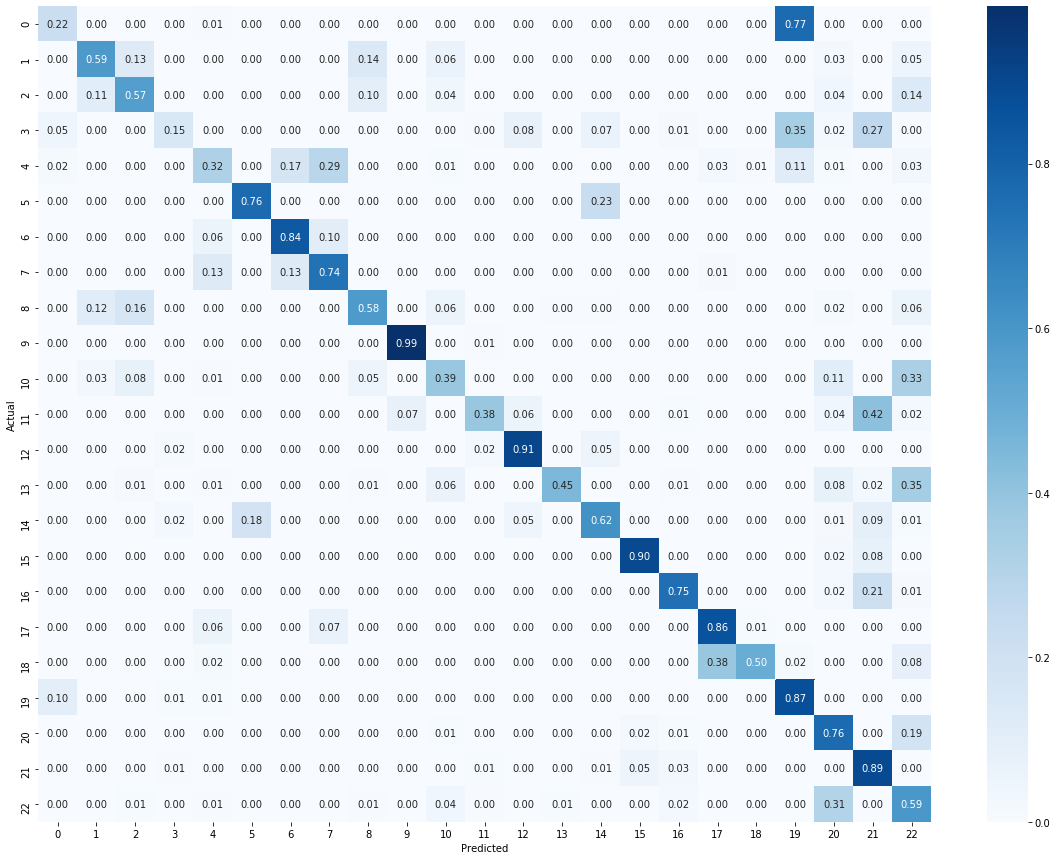

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
cm =confusion_matrix(y_test, rfc_pred)

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues', ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [9]:
classification_report(y_test, rfc_pred, output_dict = True)

{'A_ACCEPTED': {'precision': 0.2993827160493827,
  'recall': 0.22427745664739884,
  'f1-score': 0.2564441506939854,
  'support': 865},
 'A_ACTIVATED': {'precision': 0.6676923076923077,
  'recall': 0.5864864864864865,
  'f1-score': 0.6244604316546762,
  'support': 370},
 'A_APPROVED': {'precision': 0.5739348370927319,
  'recall': 0.5682382133995038,
  'f1-score': 0.5710723192019951,
  'support': 403},
 'A_CANCELLED': {'precision': 0.36097560975609755,
  'recall': 0.147117296222664,
  'f1-score': 0.20903954802259886,
  'support': 503},
 'A_DECLINED': {'precision': 0.4223300970873786,
  'recall': 0.32079646017699115,
  'f1-score': 0.3646269907795474,
  'support': 1356},
 'A_FINALIZED': {'precision': 0.7411347517730497,
  'recall': 0.7627737226277372,
  'f1-score': 0.7517985611510791,
  'support': 822},
 'A_PARTLYSUBMITTED': {'precision': 0.8235883728700301,
  'recall': 0.8355932203389831,
  'f1-score': 0.8295473666498401,
  'support': 2950},
 'A_PREACCEPTED': {'precision': 0.6925515055467

## Preprocessing the data, so it is more trace based

In [19]:
data_2012 = pd.read_csv('BPI_2012.csv')
data_2012.head(15)

,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
0,173688,A_SUBMITTED,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112
1,173688,A_PARTLYSUBMITTED,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112
2,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
3,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
4,173688,W_Completeren aanvraag,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112
5,173688,A_ACCEPTED,2011/10/01 11:42:43.308,2011/10/01 11:42:43.308,20000,2011/10/01 00:38:44.546,10862
6,173688,O_SELECTED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
7,173688,A_FINALIZED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
8,173688,O_CREATED,2011/10/01 11:45:11.197,2011/10/01 11:45:11.197,20000,2011/10/01 00:38:44.546,10862
9,173688,O_SENT,2011/10/01 11:45:11.380,2011/10/01 11:45:11.380,20000,2011/10/01 00:38:44.546,10862


In [ ]:
data_2012['next_case'] = data_2012['case'].shift(-1)
data_2012['next_event'] = data_2012['event'].shift(-1)
for row, value in data_2012.iterrows():
    if value['case'] != value['next_case':
        data_2012['next_event'][row] = 'Finished'

In [ ]:
events = data_2012['event'].unique()

In [ ]:
for x in events:
    data_2012[x] = df_copy.apply(lambda _: 0, axis=1)

In [18]:
new_list = data_2012['case'].unique()

NameError: name 'data_2012' is not defined

In [ ]:
for case_index in lst_case_ID:

    # Construct occurance list
    case_events = []
    for ev_index in data_2012[data_2012['case'] == case_index].T:
        case_events.append(data_2012.loc[ev_index, 'event'])
    
    # Constructed occurance list, now add them to the rows of the case
    for (case_index, ev_index) in enumerate(data_2012[data_2012['case'] == case_index].T):
        occurred_events = case_events[0:case_index]
        
        for evType in occurred_events:
            data_2012.iloc[ev_index, data_2012.columns.get_loc(evType)] = 1

In [ ]:
pd.set_option('display.max_columns', None)
data_2012[data_2012['case'] == 173691]

In [ ]:
# Exporting to CSV
data_2012.to_csv('bpi_2012_rft.csv')

## Splitting the data

In [ ]:
data_rft = pd.read_csv('bpi_2012_rft.csv')
data_rft.head(15)

In [ ]:
df_grouped = data_rft.groupby('case')

In [ ]:
list_1st_events = {'case_id': [], 'event': [], 'event_time': []}

for case, grp in df_grouped:
    sorted_grp = grp.sort_values('startTime')
    
    list_1st_events['case_id'].append(sorted_grp.iloc[0]['case'])
    list_1st_events['event'].append(sorted_grp.iloc[0]['event'])
    list_1st_events['event_time'].append(sorted_grp.iloc[0]['startTime'])

In [ ]:
first_events_times = pd.DataFrame(data=list_1st_events)
first_events_times.sort_values('event_time', inplace=True)

first_events_times

In [ ]:
first_events_times['time_threshold'] = pd.to_datetime('2011/12/31')

df_training_testing = first_events_times[first_events_times['event_time'] <first_events_times['time_threshold']]
df_validation = first_events_times[first_events_times['event_time'] >= first_events_times['time_threshold']]

df_training_testing = data_2012[data_2012['case'].isin(df_training_testing['case_id'])]
df_validation = data_2012[data_2012['case'].isin(df_validation['case_id'])]

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_training_testing, test_size=0.3)

In [ ]:
df_train.to_csv('train1.csv')
df_test.to_csv('test1.csv')